# Imports

In [1]:
import numpy as np

In [2]:
from src.convolution import step_function, step_functions, function_norm, convolution_integrand
from src.spectrum import Spectrum, from_str, from_csv, SpectrumValueType
from src.paths import project_dir

In [3]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [4]:
!python -V

Python 3.9.8


# Step function

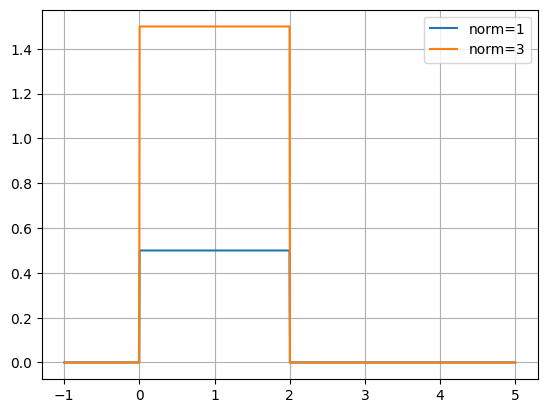

In [5]:
xvalues = np.linspace(start=-1, stop=5, num=1000)
yvalues = step_functions(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="norm=1")
ax.plot(xvalues, step_functions(xvalues, norm=3), label="norm=3")
ax.grid();
ax.legend();

## Norm

In [6]:
function_norm(step_function, lower_limit=-1, upper_limit=3)

1.0

In [7]:
function_norm(step_function, lower_limit=-1, upper_limit=3, args=(5,))

5.0

## Convolution

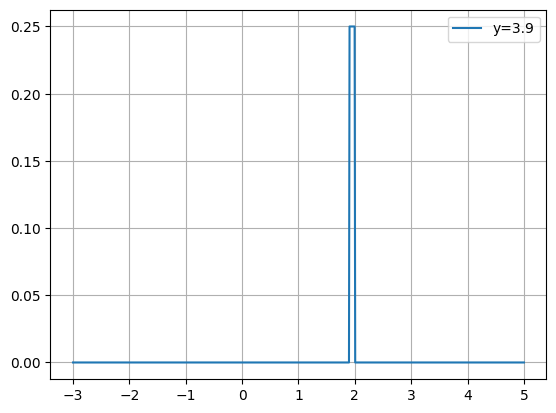

In [12]:
y = 3.9
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

In [9]:
xvalues = np.linspace(start=-1, stop=5, num=1000)
yvalues = convolution_integrand(step_functions)(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="norm=1")
ax.plot(xvalues, step_functions(xvalues, norm=3), label="norm=3")
ax.grid();
ax.legend();

TypeError: _convolution_integrand() missing 1 required positional argument: 'y'

# Spectrum

In [ ]:
spectrum = from_csv(project_dir / 'data' / 'interim' / 'data.csv', delimiter=',', value_type=SpectrumValueType.yfy)
spectrum.norm

0.9938634018608192

In [ ]:
pdf_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function, lower_limit=spectrum.bin_edges[0], upper_limit=spectrum.bin_edges[-1])

0.9938776064434781

In [ ]:
pdf_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function)

0.9935992918361423

In [ ]:
function_norm(spectrum.bin_value, args=(SpectrumValueType.fy,))

0.9935992918361423